In [2]:
#!pip install pybaseball

#pybaseball is useful for accessing Baseball Savant data in Python.


pybaseball uses the MLB Player IDs to separate players.

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pybaseball as bb

In [17]:
###Function to draw home plate and strike zone lines

def draw_sz(sz_top=3.5, sz_bot=1.5, ls='k-'):
  """
  draw strike zone
  draw the strike zone on a plot using mpl
  inputs:
    sz_top: top of strike zone (ft)
    sz_bot: bottom of strike zone (ft)
    ls: linestyle (use `plt.plot()` linestyle conventions)
  output:
    strike zone plot
  """
  plt.plot([-0.708, 0.708], [sz_bot,sz_bot], ls)
  plt.plot([-0.708, -0.708], [sz_bot,sz_top], ls)
  plt.plot([0.708, 0.708], [sz_bot,sz_top], ls)
  plt.plot([-0.708, 0.708], [sz_top,sz_top], ls)

def draw_home_plate(catcher_perspective=True, ls='k-'):
  """
  draw home plate from either the catcher perspective or pitcher perspective
  inputs:
    catcher_perspective: orient home plate in the catcher POV. if False, orients
      home plate in the pitcher POV.
    ls: linestyle (use `plt.plot()` linestyle conventions)
  output:
    home plate plot
  """
  if catcher_perspective:
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,-0.3], ls)
    plt.plot([0.708, 0.708], [0,-0.3], ls)
    plt.plot([-0.708, 0], [-0.3, -0.6], ls)
    plt.plot([0.708, 0], [-0.3, -0.6], ls)
  else:
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,0.1], ls)
    plt.plot([0.708, 0.708], [0,0.1], ls)
    plt.plot([-0.708, 0], [0.1, 0.3], ls)
    plt.plot([0.708, 0], [0.1, 0.3], ls)

In [6]:
# Load Pitcher Data

df = bb.statcast_pitcher(start_dt = '2023-03-01',
                         end_dt = '2023-11-01',
                         player_id = '656605') #Mitch Keller
                        
df.shape

Gathering Player Data


(3344, 92)

In [7]:
df.head() #Returns pitch-by-pitch data

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SI,2023-09-26,94.1,-2.14,5.96,"Keller, Mitch",664761,656605,field_out,hit_into_play,...,0,0,2,2,0,Standard,Standard,224.0,-0.024,-0.311
1,FC,2023-09-26,88.1,-1.89,6.23,"Keller, Mitch",664761,656605,NaN,swinging_strike,...,0,0,2,2,0,Standard,Standard,145.0,0.000,-0.043
2,FF,2023-09-26,95.6,-2.23,5.98,"Keller, Mitch",547180,656605,sac_fly,hit_into_play,...,0,0,2,2,0,Strategic,Standard,224.0,0.023,-0.181
3,FC,2023-09-26,85.3,-2.00,6.26,"Keller, Mitch",547180,656605,NaN,ball,...,0,0,1,1,0,Standard,Standard,109.0,0.018,0.004
4,FF,2023-09-26,93.4,-2.20,5.94,"Keller, Mitch",547180,656605,NaN,called_strike,...,0,0,1,1,0,Standard,Standard,221.0,0.000,-0.115


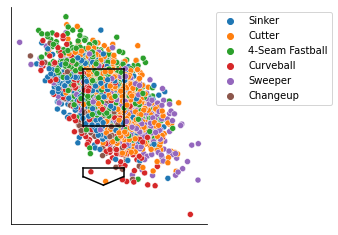

In [23]:
#Plotting All Pitches Colored by Pitch Type
##Looks like the standard pitch graph on Savant

fig = sns.scatterplot(data=df, x='plate_x', y='plate_z',
               hue='pitch_name')

#The data on Savant is taken from the top down, so Z is the height.

sns.despine() #Removes lines around the graphing area for extra spacing
fig.xaxis.set_visible(False)
fig.yaxis.set_visible(False)
fig.set_aspect('equal') #Sets 1 unit on X to 1 unit on Y

#Without the equal set aspect, the strike zone looks like a square.

#Draw strike zones and home plate
##See above functions
draw_sz()
draw_home_plate()

plt.legend(bbox_to_anchor=(1.02,1), loc=2)
plt.show()

Creating the Barrel Plot on Savant

In [47]:
df_plt = df.copy()

In [48]:
df_plt.loc[:, ['launch_angle', 'launch_speed', 'launch_speed_angle']].head().dropna()

,launch_angle,launch_speed,launch_speed_angle
0,5.0,99.9,4.0
2,15.0,111.3,6.0


Launch speed angle is an ID used to separate the six types of hits shown on the Savant visual.

In [49]:
#How to replace values in a column with a dictionary of values

contact = {
    1:'Weak Contact',
    2:'Topped',
    3:'Hit Under',
    4:'Flares/Burners',
    5:'Solid Contact',
    6:'Barrels'
}
df_plt['launch_speed_angle'] = df_plt['launch_speed_angle'].map(contact)

In [50]:
df_plt['launch_angle'] = df_plt['launch_angle']*np.pi/180
df_plt.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SI,2023-09-26,94.1,-2.14,5.96,"Keller, Mitch",664761,656605,field_out,hit_into_play,...,0,0,2,2,0,Standard,Standard,224.0,-0.024,-0.311
1,FC,2023-09-26,88.1,-1.89,6.23,"Keller, Mitch",664761,656605,NaN,swinging_strike,...,0,0,2,2,0,Standard,Standard,145.0,0.000,-0.043
2,FF,2023-09-26,95.6,-2.23,5.98,"Keller, Mitch",547180,656605,sac_fly,hit_into_play,...,0,0,2,2,0,Strategic,Standard,224.0,0.023,-0.181
3,FC,2023-09-26,85.3,-2.00,6.26,"Keller, Mitch",547180,656605,NaN,ball,...,0,0,1,1,0,Standard,Standard,109.0,0.018,0.004
4,FF,2023-09-26,93.4,-2.20,5.94,"Keller, Mitch",547180,656605,NaN,called_strike,...,0,0,1,1,0,Standard,Standard,221.0,0.000,-0.115


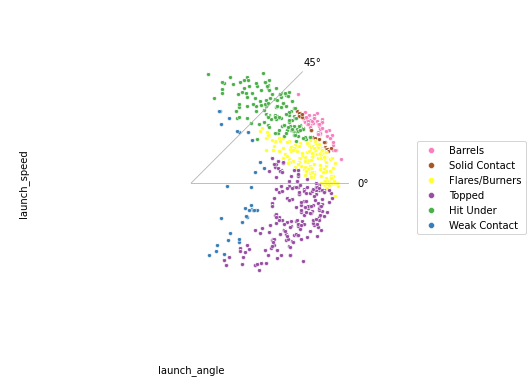

In [64]:
hue_order = ['Barrels', 'Solid Contact', 'Flares/Burners',
             'Topped', 'Hit Under', 'Weak Contact']
#To set the order of colors in the visual

fig = sns.FacetGrid(df_plt, hue='launch_speed_angle', 
                    palette='Set1_r',
                    sharex=False,
                    sharey=False,
                    despine=False,
                    height=5,
                    hue_order=hue_order,
                    subplot_kws=dict(projection='polar'))

fig.map(sns.scatterplot,'launch_angle','launch_speed')
plt.legend(bbox_to_anchor=(1.2,0.65), loc=2)

for n in range(len(fig.ax.yaxis.majorTicks)):
    fig.ax.yaxis.majorTicks[n].set_visible(False)
for n in range(len(fig.ax.xaxis.majorTicks)):
    if n > 1:
        fig.ax.xaxis.majorTicks[n].set_visible(False)
        
for n in range(len(fig.ax.collections)):
    fig.ax.collections[n].set_sizes([15])
        
#This removes all of the rings of axes and all lines except 0 and 45 degrees.


fig.ax.spines['polar'].set_visible(False)

#This removes the outer circle from the plot.

plt.subplots_adjust(top=1, right=1)
plt.show()